# Explore here

# Unsupervised Learning with K-Means - California Housing

## 1) Import required libraries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 2) Load and visualize dataset
Import and load the dataset, then visualize first data, its main features and describe the data

In [191]:
house_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
print(house_data.head())
print('🔹 Dataset info:')
print(house_data.info())
print('🔹 Describe dataset:')
print(house_data.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64

## 3) Discart irrelevant features
Keep columns for latitude, longitude and MedInc features.

In [192]:
house_data = house_data[['MedInc', 'Latitude', 'Longitude']]
print(house_data.head())

   MedInc  Latitude  Longitude
0  8.3252     37.88    -122.23
1  8.3014     37.86    -122.22
2  7.2574     37.85    -122.24
3  5.6431     37.85    -122.25
4  3.8462     37.85    -122.25


## 4) Univariate analysis

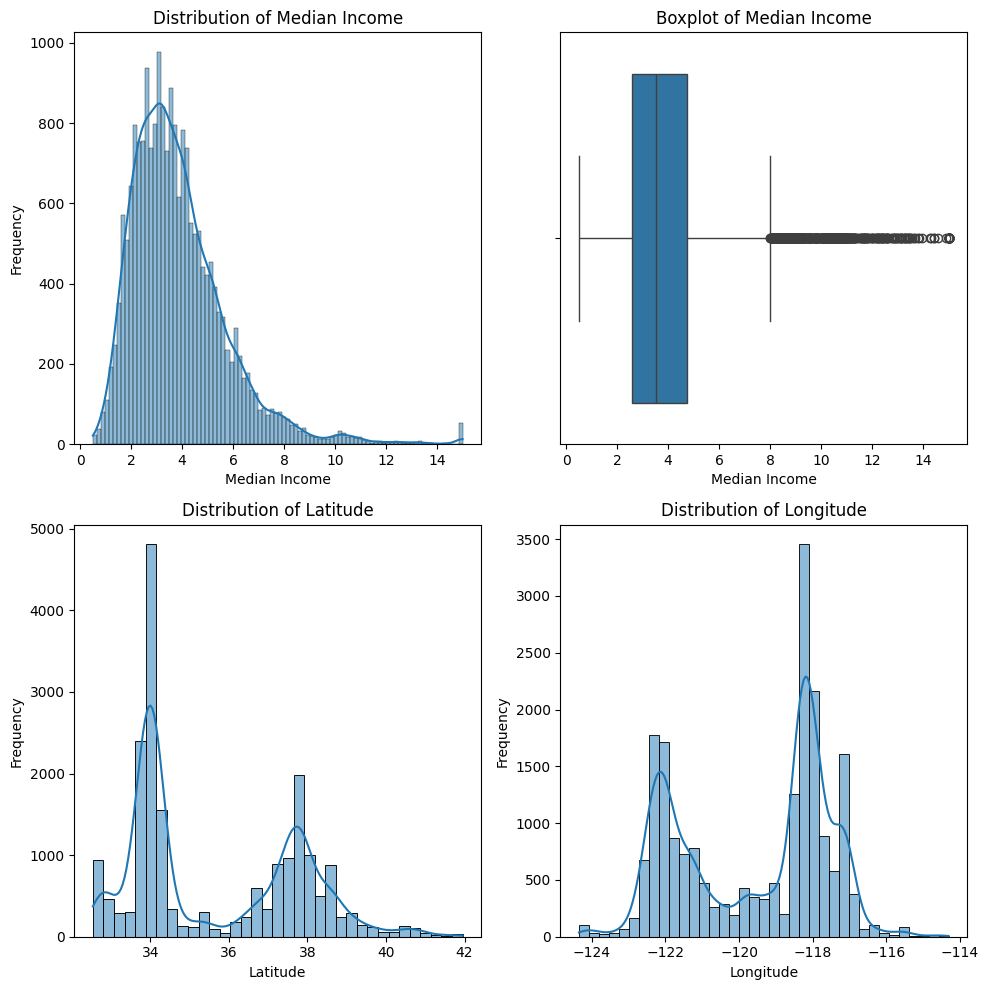

In [193]:
fig, axis = plt.subplots(2,2, figsize=(10,10))
sns.histplot(house_data, ax=axis[0, 0], x='MedInc', kde=True)
axis[0, 0].set_title("Distribution of Median Income")
axis[0, 0].set_xlabel("Median Income")
axis[0, 0].set_ylabel("Frequency")

sns.boxplot(house_data, ax=axis[0, 1], x='MedInc')
axis[0, 1].set_title("Boxplot of Median Income")
axis[0, 1].set_xlabel("Median Income")

sns.histplot(house_data, ax=axis[1, 0], x='Latitude', kde=True)
axis[1, 0].set_title("Distribution of Latitude")
axis[1, 0].set_xlabel("Latitude")
axis[1, 0].set_ylabel("Frequency")

sns.histplot(house_data, ax=axis[1, 1], x='Longitude', kde=True)
axis[1, 1].set_title("Distribution of Longitude")
axis[1, 1].set_xlabel("Longitude")
axis[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Univariate analysis interpretation
- **Median Income:** The histogram shows a right-skewed distribution, with most values concentrated between 0 and 10. The boxplot indicates the presence of outliers.
- **Latitude & Longitude:** There are clusters of housing data around 2 main geographical locations; the data is not normally distributed.

## 5) Multivariate data analysis

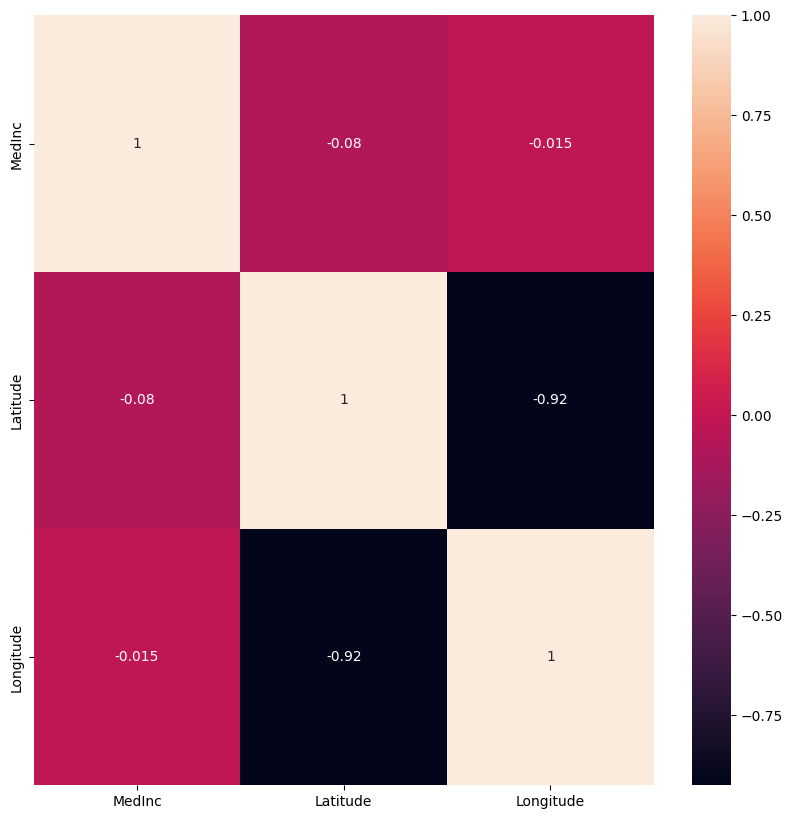

In [194]:
plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(), annot=True)
plt.show()

### Multivariate analysis interpretation
- **Latitude & Longitude** show a strong positive correlation.
- **Median Income** does not show any correlation with latitude or longitude.

## 6) Divide data into train and test samples
The dataset is split into train and test sub-datasets in order to make predictions (although not needed for unsupervised machine learning)

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(house_data, test_size=0.2, random_state=117)
print(X_train)

       MedInc  Latitude  Longitude
5358   3.6953     34.05    -118.40
5156   1.7656     33.96    -118.28
6244   3.7917     34.05    -117.99
10431  3.2232     33.43    -117.62
14591  2.7401     32.82    -117.17
...       ...       ...        ...
15969  3.4773     37.71    -122.41
20055  2.4167     35.85    -119.12
6224   4.1731     34.05    -117.93
9328   3.9917     37.96    -122.53
11758  5.4896     38.75    -121.24

[16512 rows x 3 columns]


## 7) Apply KMeans algorithm
Apply Kmeans algorithm to the train dataset

In [196]:
from sklearn.cluster import KMeans

model_train = KMeans(n_clusters=6, random_state=117)
model_train.fit(X_train)

KMeans(n_clusters=6, random_state=117)

## 8) Assign cluster to data points
Use **model.labels_** to assign each data point to a cluster and store this information on a new column

In [197]:
# Assign clusters to train dataset
X_train['cluster'] = model_train.labels_
print(X_train.head())

       MedInc  Latitude  Longitude  cluster
5358   3.6953     34.05    -118.40        2
5156   1.7656     33.96    -118.28        2
6244   3.7917     34.05    -117.99        2
10431  3.2232     33.43    -117.62        2
14591  2.7401     32.82    -117.17        2


## 9) Predict clusters
Use the X_test dataset to predict clusters of association, applying the **model_train** algorithm.

In [198]:
predictions = model_train.predict(X_test)
print(predictions)

# Assign clusters to test dataset
X_test['cluster'] = predictions
print(X_test.head())

[2 0 4 ... 4 0 0]
        MedInc  Latitude  Longitude  cluster
8140    3.8162     33.82    -118.11        2
9697    2.0244     36.69    -121.61        0
19281   4.3523     38.42    -122.73        4
9461    2.3250     39.50    -123.79        0
18351  10.7237     37.41    -122.18        5


## 10) Evaluate performances

In [199]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(X_test['cluster'], predictions)
print(f'🔹 Model accuracy score: {model_accuracy} %')

🔹 Model accuracy score: 1.0 %


## 11) Visualize clusters

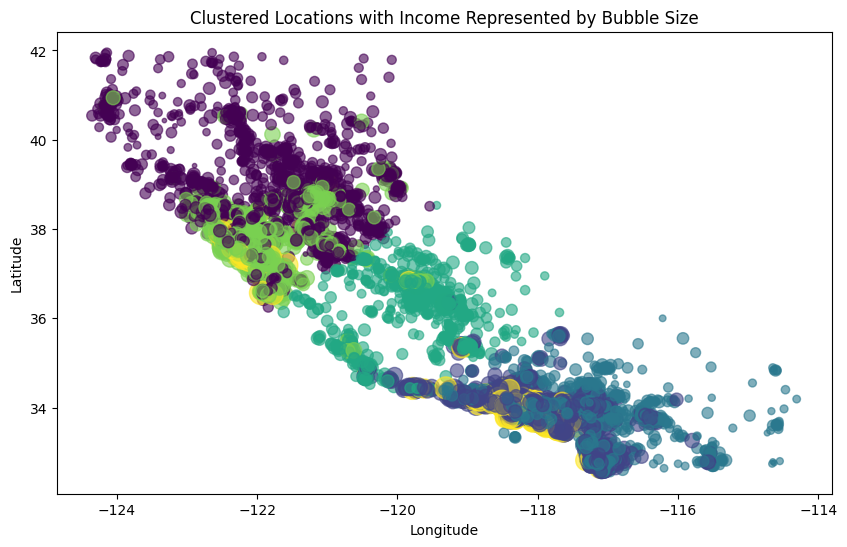

In [200]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train['Longitude'], X_train['Latitude'],
    s=X_train['MedInc'] * 20,  # Scale income to control size
    c=X_train['cluster'], cmap='viridis', alpha=0.6
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Clustered Locations with Income Represented by Bubble Size")
plt.show()

## 12) Train a supervised model
Make predictions and compare performace with KNeighborsClassifier after normalizing the dataset

In [201]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Latitude', 'Longitude', 'MedInc']])
X_test_scaled = scaler.transform(X_test[['Latitude', 'Longitude', 'MedInc']])

# Divide dataset into X and y
y_train_knn = X_train['cluster']
y_test_knn = X_test['cluster']

knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(X_train_scaled, y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

## 13) Run predictions and evaluate performances

In [202]:
knn_predictions = knn.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(y_test_knn, knn_predictions)
print(f'🔹 Accuracy score of KNN model: {knn_accuracy:.2%}')

🔹 Accuracy score of KNN model: 99.03%


#### Conclusion: Comparing K-Means and KNN

- **K-Means (Unsupervised Learning)** grouped the data into **6 clusters** based on `Latitude`, `Longitude`, and `MedInc`.
- **K-Nearest Neighbors (Supervised Learning)** successfully learned to classify the clusters with an **accuracy of 99.03%**.
- **Key Takeaways:**
  - K-Means helps find **hidden patterns** without labels.
  - KNN can **accurately predict** new data points once trained on these clusters.
  - This approach is useful when **no labeled data is available initially**.

## 14) Save the models

In [203]:
import joblib

joblib.dump(model_train, "kmeans_model.pkl")
joblib.dump(knn, "KNeighborClassifier.pkl")

['KNeighborClassifier.pkl']